In [1]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [2]:
#Estraggo i training e test set dai csv 
train = pnd.read_csv("train.csv")
test = pnd.read_csv("test.csv")

#Definisco le feature da usare per la classificazione, escludendo i valori 'RowNumber', 'CustomerID' e 'Surname' 
#non utili all'analisi in quanto identificatori o valori unici delle tuple
features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

#Codifica dei parametri stringa 'Geografia' e 'Genere' in numeri interi per l'utilizzo nel fitting
le = preprocessing.LabelEncoder()
train["Geography"] = le.fit_transform(train["Geography"])
train["Gender"] = le.fit_transform(train["Gender"])
test["Geography"] = le.fit_transform(test["Geography"])
test["Gender"] = le.fit_transform(test["Gender"])


In [3]:
#Preparo i set per l'addestramento
X_train = train[features]
Y_train = train.Exited
X_test = test[features]
Y_test = test.Exited

#Utilizzo un Albero Decisionale per la classificazione e, dopo il fitting stampo le prestazioni
tree = DecisionTreeClassifier(max_depth = 6)
tree.fit(X_train, Y_train)
print("Train set accuracy: {:.3f}".format(tree.score(X_train, Y_train)))
print("Test set accuracy: {:.3f}".format(tree.score(X_test, Y_test)))


Train set accuracy: 0.868
Test set accuracy: 0.850


Features importance:
[0.01436125 0.01231733 0.00048363 0.40919927 0.02146075 0.06196745
 0.30164141 0.         0.15354072 0.02502818]


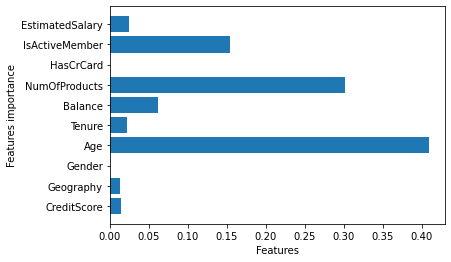

In [4]:
#Visualizzo l'importanza delle diverse feature matematicamente e graficamente
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), features)
plt.ylabel("Features importance")
plt.xlabel("Features")
print("Features importance:")
print(tree.feature_importances_)
